Para começar, é necessário importar a biblioteca de Machine Learning pytorch.

In [100]:
import torch

## Derivadas Parciais

Para realizar as derivadas parciais, é necessário criar três tensores chamados de x,y,z, que podem ser como os vetores ou escalares para serem usados nos cálculos.
- o argumento da função torch.tensor requires_grad=True, significa que vamos rastrear cada operação matemática que será efetuada nesses tensores para facilitar o pytorch derivá-las futuramente

In [101]:
# Ativação do tracking para derivadas
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)

aqui iremos criar uma função "f" onde ela irá manipular os 3 tensores e por conta do requires_grad=True, o pytorch criará um grafo, onde será utilizado para os calculos das derivadas parciais.

In [102]:
# Função escalar com polinômios e trigonometria
f = x**2 * torch.sin(y) + torch.exp(z)

Nessa etapa, o método .backwards() irá percorrer esse grafo de trás para frente, assim ele consegue recriar as etapas de calculos, podendo calcular as derivadas parciais.
- .backwards() é uma metodologia de backpropagation, onde se vai da ponta final do grafo / rede neural, em sentido do início

In [103]:
# Derivadas parciais
f.backward()

Os resultados das derivadas parciais são armazenadas no .grad de cada tensor (x,y,z). Esses gradientes são a base para o treinamento de redes neurais, onde esses valores são usados como pesos para otimizar o algoritmo da rede neural.

In [104]:
print(f"df/dx: {x.grad}")
print(f"df/dy: {y.grad}")
print(f"df/dz: {z.grad}")

df/dx: 1.8185948133468628
df/dy: -0.416146844625473
df/dz: 20.08553695678711


_________________________

## Álgebra Linear Vetorial e Matricial

Primeiro, definimos os tensores que usaremos em nossos cálculos.

a e b são tensores de 1 dimensão, representando vetores.

M é um tensor de 2 dimensões, representando uma matriz.

In [105]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])
M = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])


Operação escalar e vetorial dos tensores.
- para o escalar iremos usar o método .dot(tensor_1, tensor_2)
- para o vetorial iremos usar o método .cross(tensor_1, tensor_2)
- para a multiplicar a matriz por um vetor iremos usar o método .mv(matriz, tensor)
- para multiplicar matrizes iremos usar o método .mm(matriz_1, matriz_2)
- para transpor a matriz iremos usar o método .T


In [106]:
# Produto escalar
escalar = torch.dot(a, b)

# Produto vetorial
vetorial = torch.linalg.cross(a, b)

# Produto matriz-vetor
matriz_vetor = torch.mv(M, a)

# Produto matriz-matriz
matriz_matriz = torch.mm(M, M.T)

# Transposição
matriz_transposta = M.T

Os resultados serão:

In [107]:
print("escalar (dot):", escalar)
print("vetorial (cross):", vetorial)
print("matriz_vetor (mv):", matriz_vetor)
print("matriz_matriz (mm):", matriz_matriz)
print("matriz_transposta(T):", matriz_transposta)

escalar (dot): tensor(32.)
vetorial (cross): tensor([-3.,  6., -3.])
matriz_vetor (mv): tensor([14., 32.])
matriz_matriz (mm): tensor([[14., 32.],
        [32., 77.]])
matriz_transposta(T): tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


_____________

## Gradiente, Jacobiano, Hessiana, Rotacional

Primeiro é necessário importar do módulo torch.autograd.functional as funções jacobian e hessian

In [108]:
from torch.autograd.functional import jacobian, hessian

Definimos uma função simples (scalar_field) que recebe um tensor de entrada p (que representa um ponto no espaço, como [x, y]) e retorna um valor escalar.
a função scalar_field calcula x^2 + y^3

In [109]:
# Função escalar de duas variáveis
def scalar_field(p):
    x, y = p[0], p[1]
    return x**2 + y**3

Criamos um tensor que representa o ponto onde queremos calcular o gradiente e a Hessiana. O argumento requires_grad=True é fundamental, como explicado antes, pois informa ao PyTorch para rastrear todas as operações para que as derivadas possam ser calculadas.

In [110]:
# Tensor com requires_grad ativado
point = torch.tensor([1.0, 2.0], requires_grad=True)

# Gradiente usando autograd
f = scalar_field(point)
f.backward()
grad = point.grad

A matriz Hessiana é uma matriz quadrada de derivadas parciais de segunda ordem. Ela descreve a curvatura de uma função multivariável.

In [111]:
# Hessiana usando autograd.functional
H = hessian(scalar_field, point)

Os resultados serão:

In [112]:
print("Gradiente:", grad)
print("Hessiana:\n", H)

Gradiente: tensor([ 2., 12.])
Hessiana:
 tensor([[ 2.,  0.],
        [ 0., 12.]])


____

## Jacobiano de Campo Vetorial

Definimos uma função (vector_field) que, ao contrário das funções anteriores que retornavam um escalar, agora retorna um vetor de saídas. O tensor de entrada p representa um ponto [x, y].
- torch.stack é usado para empilhar os resultados em um único tensor de saída.

In [113]:
# Campo vetorial: retorna vetor [f1(x, y), f2(x, y)]
def vector_field(p):
    x, y = p
    return torch.stack([
        x**2 + y,
        torch.sin(x) * y
    ])

Criamos o tensor de entrada para o nosso campo vetorial. Novamente, requires_grad=True é essencial para que o PyTorch possa rastrear as operações.

In [114]:
point = torch.tensor([1.0, 2.0], requires_grad=True)

O Jacobiano é uma matriz onde cada linha corresponde a uma função de saída (f_1,f_2,...) e cada coluna corresponde a uma variável de entrada (x,y,...).

In [115]:
# Jacobiano: derivadas de cada componente do vetor
J = jacobian(vector_field, point)

Os resultados serão:

In [116]:
print("Jacobiano:\n", J)

Jacobiano:
 tensor([[2.0000, 1.0000],
        [1.0806, 0.8415]])


_____

## Rotacional (Curl) em 3D

Este código demonstra como calcular o Rotacional (ou Curl) de um campo vetorial 3D utilizando a matriz Jacobiana calculada pelo PyTorch. O Rotacional mede a "rotação" de um campo vetorial em um determinado ponto.

Definimos uma função (vector_field_3d) que recebe um vetor de entrada 3D (p = [x, y, z]) e retorna um vetor de saída 3D.

In [117]:
def vector_field_3d(p):
    x, y, z = p
    return torch.stack([
        y * z,
        x * z,
        x * y
    ])

Criamos o tensor de entrada para o nosso campo vetorial e o Jacobiano de um campo vetorial 3D é uma matriz 3x3. Cada elemento da matriz J_ij é a derivada parcial da i-ésima componente de saída em relação à j-ésima variável de entrada.

In [118]:
p3d = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
J3d = jacobian(vector_field_3d, p3d)


O código usa os elementos da matriz Jacobiana para calcular cada componente do Rotacional. O acesso aos elementos da matriz é feito usando a notação [linha, coluna].

In [119]:
# Rotacional = linha cruzada da matriz jacobiana
curl = torch.tensor([
    J3d[2,1] - J3d[1,2],  # dFz/dy - dFy/dz
    J3d[0,2] - J3d[2,0],  # dFx/dz - dFz/dx
    J3d[1,0] - J3d[0,1]   # dFy/dx - dFx/dy
])

Os resultados serão:

In [120]:
print("Rotacional (Curl):", curl)

Rotacional (Curl): tensor([0., 0., 0.])


_____

## Visualização com Matplotlib

Este código utiliza a biblioteca Matplotlib para criar um gráfico de "campo de setas" (quiver plot), que visualiza um campo vetorial 2D. Este tipo de gráfico é fundamental para entender o comportamento de vetores em cada ponto de um plano.
- Primeiro, importamos as bibliotecas necessárias: matplotlib.pyplot para a plotagem e numpy para operações numéricas, como a criação de grades de pontos.

In [121]:
import matplotlib.pyplot as plt
import numpy as np

Para plotar o campo vetorial, precisamos de uma grade de pontos no plano. Usamos np.meshgrid para criar duas matrizes, X e Y, que representam as coordenadas x e y de cada ponto na grade.

Em seguida, definimos as componentes U e V do campo vetorial. Cada ponto (x, y) na nossa grade terá uma seta que aponta na direção (U, V).

In [122]:
X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = -Y
V = X

- A função plt.quiver é a ferramenta principal para a visualização. Ela plota setas em cada ponto da grade.
- As linhas restantes ajustam a aparência do gráfico para torná-lo mais informativo.

O uso de plt.axis('equal') é importante para garantir que o círculo de rotação não seja distorcido. O resultado final é um gráfico claro que visualmente representa a rotação do campo vetorial.

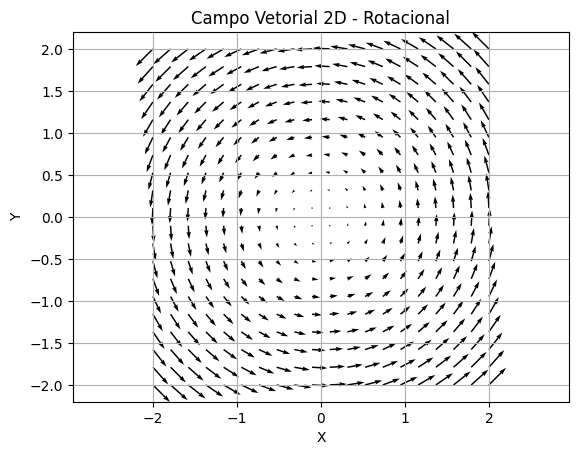

In [123]:
# Campo vetorial 2D (rotação)
plt.figure()
plt.quiver(X, Y, U, V)
plt.title("Campo Vetorial 2D - Rotacional")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

_____

## Mecânica do Contínuo: Campo de Deslocamento, Deformação e Tensão

Definimos um campo de deslocamento vetorial u = [u1, u2] que descreve como cada ponto (x, y) em um corpo se move.

In [124]:
# Deslocamento u = [u1(x, y), u2(x, y)] com deformações lineares
def deslocamento(p):
    x, y = p
    return torch.stack([
        0.01 * x * y,        # u1
        0.01 * (x**2 - y**2) # u2
    ])

O gradiente do campo de deslocamento é a matriz Jacobiana, que contém todas as derivadas parciais de primeira ordem do campo de deslocamento.

In [125]:
# Gradiente de deslocamento (Jacobiano = tensor de deformação infinitesimal)
point = torch.tensor([1.0, 1.0], requires_grad=True)
J = jacobian(deslocamento, point)

O Tensor de Deformação Infinitesimal (
epsilon) representa a parte simétrica da deformação. Ele descreve a mudança de forma e volume do material, excluindo a rotação do corpo.

In [126]:
# Tensor de deformação infinitesimal ε = 1/2 (grad(u) + grad(u)^T)
eps = 0.5 * (J + J.T)

Os resultados serão:

In [127]:
print("Gradiente de deslocamento:\n", J)
print("Tensor de deformação ε:\n", eps)

Gradiente de deslocamento:
 tensor([[ 0.0100,  0.0100],
        [ 0.0200, -0.0200]])
Tensor de deformação ε:
 tensor([[ 0.0100,  0.0150],
        [ 0.0150, -0.0200]])
